In [1]:
# Import and GPU Support
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import time

from B_data import create_residual_data, create_IC_data, initial_u,exact_u, create_BC_data, create_RH_data,exact_u_err,Move_Time_1D
from B_Plotting import Burgers_plot, loss_plot 

# Full PINN
from B_PINN import NN
from B_PINN_train import pinn_train

# Burgers GPT-PINN
from B_VGPT_activation import P
from B_VGPT_PINN import GPT
from B_VGPT_train import gpt_train

torch.set_default_dtype(torch.float)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Current Device: {device}")
if torch.cuda.is_available():
    print(f"Current Device Name: {torch.cuda.get_device_name()}")

Current Device: cuda
Current Device Name: NVIDIA A100-SXM4-40GB


In [2]:
# Training Parameter Set
nu_training = np.linspace(0.5,2,21)
number_of_neurons = 1
largest_loss_list = np.ones(number_of_neurons)
print(f"Expected Final GPT-PINN Depth: {[2,number_of_neurons,1]}\n")
P_list = np.ones(number_of_neurons, dtype=object)
nu_pinn_train   = 1.0    

Expected Final GPT-PINN Depth: [2, 1, 1]



In [3]:
# Domain and Data
Xi, Xf         = -1.0, 1.0
Ti, Tf         =  0.0, 1.0
Nx_train, Nt_train =  101, 201
Nx_test, Nt_test = 101, 201
IC_pts, IC_simple = 100, 100
BC_pts =  100
N_RH = IC_pts
dx = 0.001
dt = 0.0002

residual_data = create_residual_data(Xi, Xf, Ti, Tf, Nx_train, Nt_train, Nx_test, Nt_test, dx,dt)
xt_resid      = residual_data[0].to(device)
f_hat         = residual_data[1].to(device)
xt_test       = residual_data[2].to(device)
xt_RHL      = residual_data[3].to(device)
xt_RHR      = residual_data[4].to(device)
xt_RHt         = residual_data[5].to(device)
xt_RHtL       = residual_data[6].to(device)



BC_data = create_BC_data(Xi, Xf, Ti, Tf, BC_pts)
BC1     = BC_data[0].to(device)
BC2     = BC_data[1].to(device)

#xt_RH_data = create_RH_data(Xi, Xf, Ti, Tf, IC_pts, N_RH,dx)
#xt_RH = xt_RH_data[0].to(device)
#xt_RHL = xt_RH_data[1].to(device)

In [4]:
# Setting PINN and TGPT-PINN
#layers_pinn = np.array([2, 30, 30, 30, 30, 30, 1])
#layers_pinn = np.array([2, 30, 30, 30, 30, 30, 1])
layers_pinn = np.array([2, 20,20,20,20, 1])

lr_gpt          = 0.005
epochs_gpt      = 1000
tol_gpt         = 1e-5

###############################################################################
################################ Training Loop ################################
###############################################################################

In [5]:
import pickle
P_name=f"IFNN_shock1.pkl"
with open(P_name, 'rb') as f:
    P_list = pickle.load(f)

0.5 stopped at epoch: 0 | gpt_loss: 3.906266927719116,rMAE: [1.2215323448181152], rRMSE:[1.1972874402999878], 0.15622751414775848, 0.12500570714473724, 0.24999824166297913, 0.0
0.5 stopped at epoch: 500 | gpt_loss: 0.0001328013022430241,rMAE: 0.010163525119423866, rRMSE:0.06565476208925247, 9.254251926904544e-05, 2.4271305392176146e-06, 1.5987484403012786e-06, 0.0
0.5 stopped at epoch: 1000 | gpt_loss: 0.00012756256910506636,rMAE: 0.009803878143429756, rRMSE:0.06549033522605896, 9.354145731776953e-05, 2.051700448646443e-06, 1.3504105709216674e-06, 0.0
layer1:tensor([[ 1.4747, -0.0064],
        [-0.1214,  0.8087]], device='cuda:0') and tensor([-0.0040, -0.0197], device='cuda:0') and layer3:tensor([[0.5021]], device='cuda:0')
GPT-PINN Training Completed



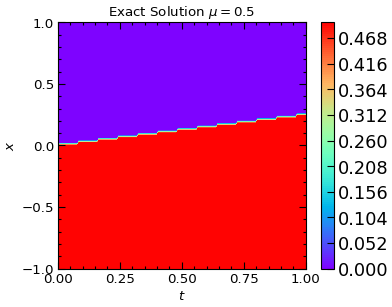

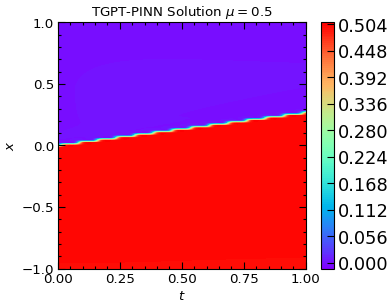

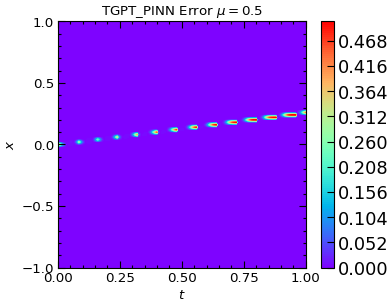

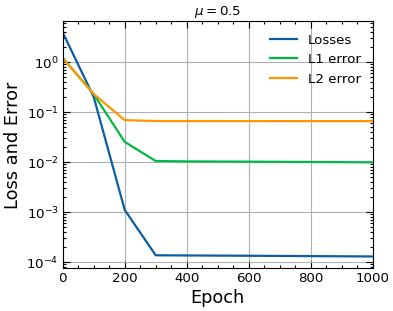

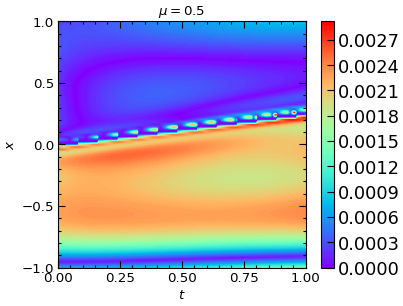

GPT-PINN at 0.5 with the Loss=0.00012756256910506636, rMAE = 0.009803878143429756, rRMSE = 0.06549033522605896 and Cor error = 0.003915395587682724


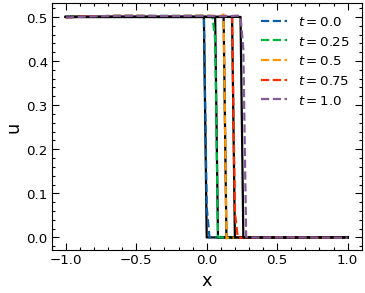

0.575 stopped at epoch: 0 | gpt_loss: 2.8223190307617188,rMAE: [0.8992050886154175], rRMSE:[0.9043399095535278], 0.11291002482175827, 0.09031736105680466, 0.18062353134155273, 0.0
0.575 stopped at epoch: 500 | gpt_loss: 0.0001614726788830012,rMAE: 0.009864031337201595, rRMSE:0.07060180604457855, 0.00012739762314595282, 2.0968136595911346e-06, 1.3106919141137041e-06, 0.0
0.575 stopped at epoch: 1000 | gpt_loss: 0.000157883288920857,rMAE: 0.009589871391654015, rRMSE:0.07052408158779144, 0.000127917475765571, 1.8731558384388336e-06, 1.1234255907766055e-06, 0.0
layer1:tensor([[ 1.3875, -0.0131],
        [-0.0708,  0.8485]], device='cuda:0') and tensor([-0.0022, -0.0136], device='cuda:0') and layer3:tensor([[0.5768]], device='cuda:0')
GPT-PINN Training Completed



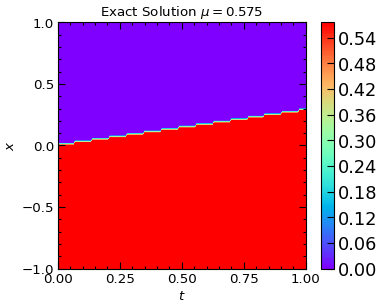

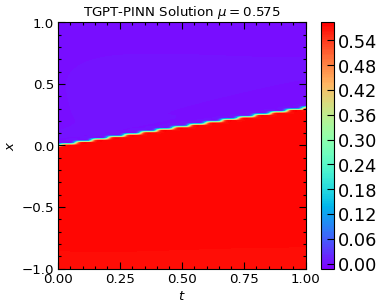

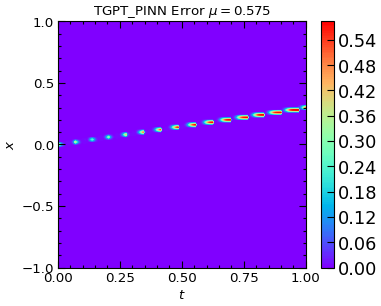

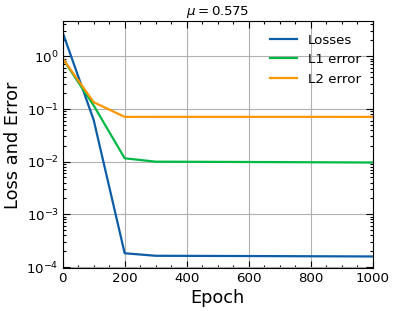

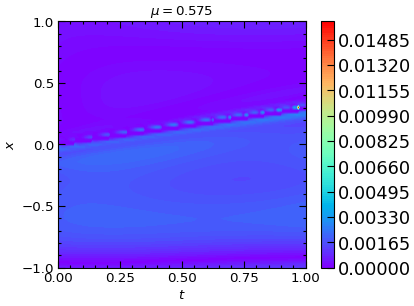

GPT-PINN at 0.575 with the Loss=0.000157883288920857, rMAE = 0.009589871391654015, rRMSE = 0.07052408158779144 and Cor error = 0.002941872924566269


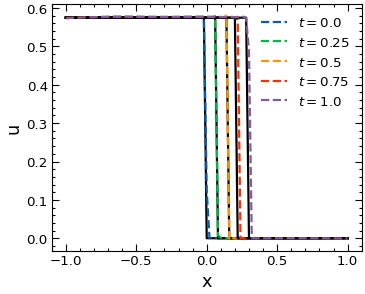

0.65 stopped at epoch: 0 | gpt_loss: 1.9141647815704346,rMAE: [0.6535530090332031], rRMSE:[0.6792494058609009], 0.07663682103157043, 0.06125401332974434, 0.12249879539012909, 0.0
0.65 stopped at epoch: 500 | gpt_loss: 0.00019042618805542588,rMAE: 0.005446534138172865, rRMSE:0.037864215672016144, 0.00016208147280849516, 1.9367828372196527e-06, 8.97688892109727e-07, 0.0
0.65 stopped at epoch: 1000 | gpt_loss: 0.00018607893434818834,rMAE: 0.005367710255086422, rRMSE:0.03792528435587883, 0.00015863987209741026, 1.8523904827816295e-06, 8.915153557609301e-07, 0.0
layer1:tensor([[ 1.3149, -0.0154],
        [-0.1112,  0.8871]], device='cuda:0') and tensor([ 0.0002, -0.0085], device='cuda:0') and layer3:tensor([[0.6515]], device='cuda:0')
GPT-PINN Training Completed



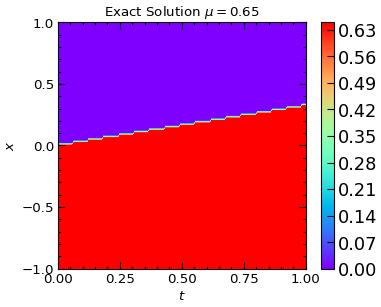

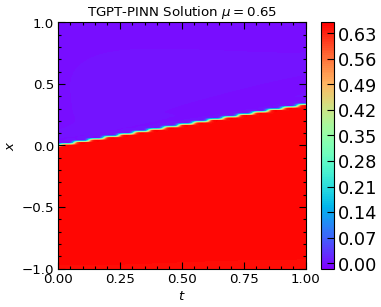

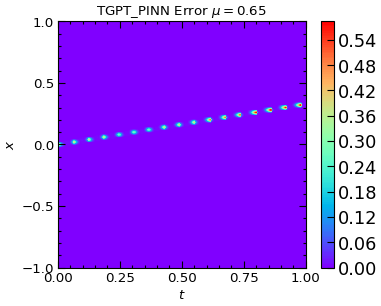

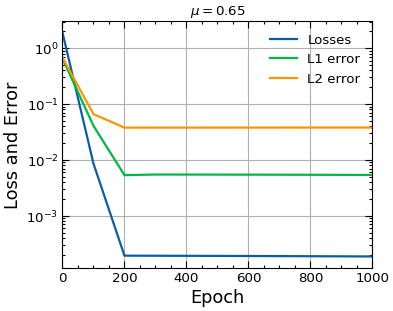

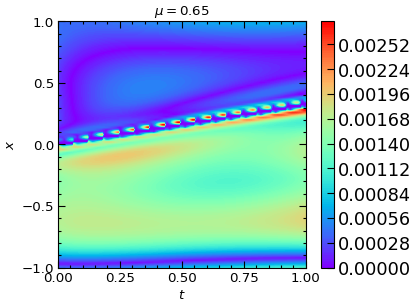

GPT-PINN at 0.65 with the Loss=0.00018607893434818834, rMAE = 0.005367710255086422, rRMSE = 0.03792528435587883 and Cor error = 0.0022138182539492846


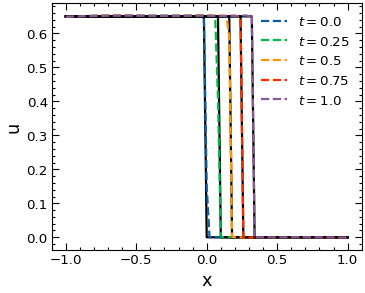

0.725 stopped at epoch: 0 | gpt_loss: 1.1818045377731323,rMAE: [0.4594959318637848], rRMSE:[0.5001720786094666], 0.04740791395306587, 0.0378156453371048, 0.0756240263581276, 0.0
0.725 stopped at epoch: 500 | gpt_loss: 0.00023656907433178276,rMAE: 0.0039652562700212, rRMSE:0.025767732411623, 0.00020678695000242442, 2.410411298114923e-06, 5.678016350429971e-07, 0.0
0.725 stopped at epoch: 1000 | gpt_loss: 0.00022900922340340912,rMAE: 0.003990234341472387, rRMSE:0.025167668238282204, 0.00019752548541873693, 2.45780506702431e-06, 6.905696636749781e-07, 0.0
layer1:tensor([[ 1.2433, -0.0225],
        [-0.1810,  0.9310]], device='cuda:0') and tensor([ 0.0010, -0.0036], device='cuda:0') and layer3:tensor([[0.7261]], device='cuda:0')
GPT-PINN Training Completed



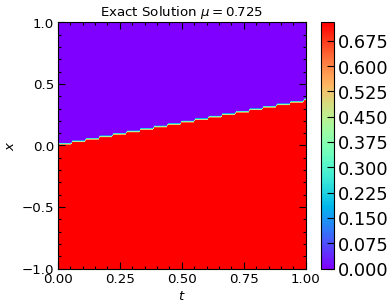

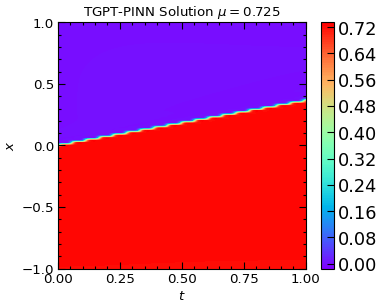

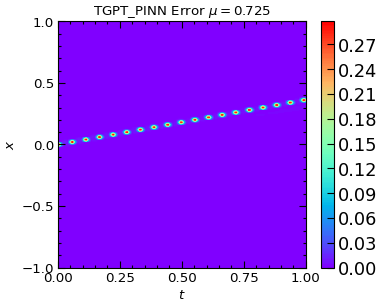

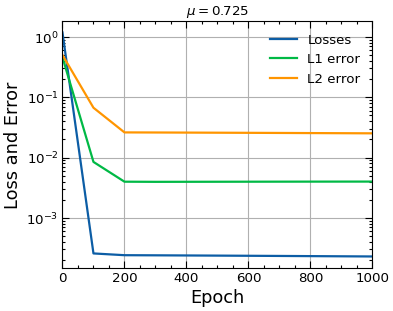

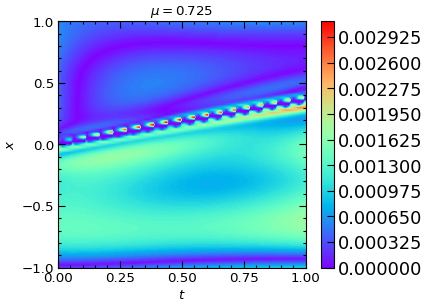

GPT-PINN at 0.725 with the Loss=0.00022900922340340912, rMAE = 0.003990234341472387, rRMSE = 0.025167668238282204 and Cor error = 0.0016135626938194036


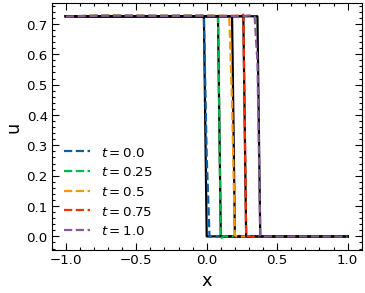

0.8 stopped at epoch: 0 | gpt_loss: 0.6252393126487732,rMAE: [0.3022778630256653], rRMSE:[0.35244157910346985], 0.02522333897650242, 0.020002298057079315, 0.03999929875135422, 0.0
0.8 stopped at epoch: 500 | gpt_loss: 0.00028062163619324565,rMAE: 0.003754905192181468, rRMSE:0.03173929825425148, 0.0002622037136461586, 1.545962163618242e-06, 2.958310005851672e-07, 0.0
0.8 stopped at epoch: 1000 | gpt_loss: 0.00027196938754059374,rMAE: 0.008114269003272057, rRMSE:0.0721389576792717, 0.00025645160349085927, 1.0153386256206431e-06, 5.364398134588555e-07, 0.0
layer1:tensor([[ 1.1781, -0.0392],
        [-0.1871,  0.9689]], device='cuda:0') and tensor([-0.0019,  0.0010], device='cuda:0') and layer3:tensor([[0.8008]], device='cuda:0')
GPT-PINN Training Completed



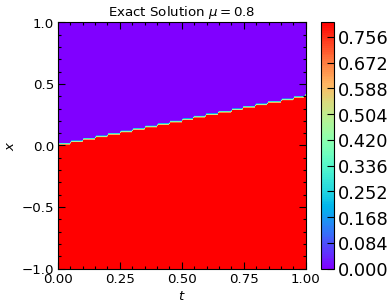

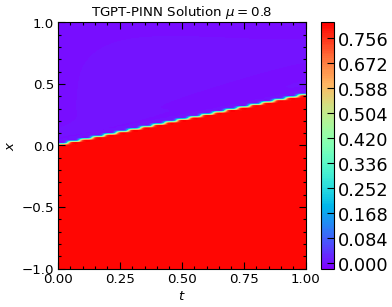

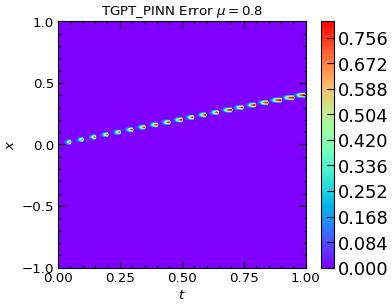

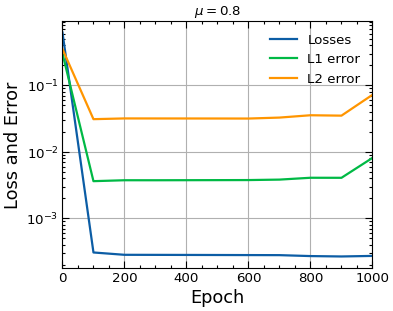

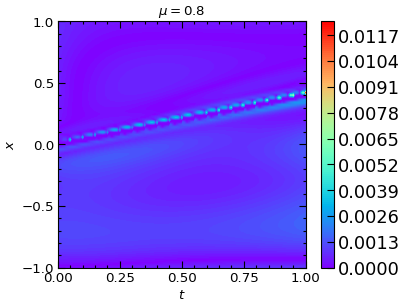

GPT-PINN at 0.8 with the Loss=0.00027196938754059374, rMAE = 0.008114269003272057, rRMSE = 0.0721389576792717 and Cor error = 0.001230887253768742


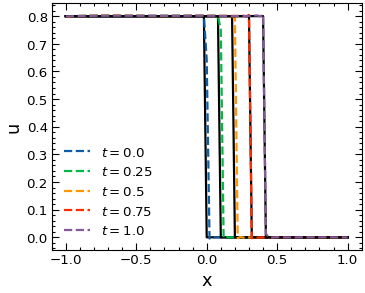

0.875 stopped at epoch: 0 | gpt_loss: 0.24446827173233032,rMAE: [0.17230966687202454], rRMSE:[0.22605684399604797], 0.010083076544106007, 0.007813949137926102, 0.015624569728970528, 0.0
0.875 stopped at epoch: 500 | gpt_loss: 0.0003293852787464857,rMAE: 0.003807449946179986, rRMSE:0.0311921127140522, 0.00031177609344013035, 1.26746397199895e-06, 4.934532285005844e-07, 0.0
0.875 stopped at epoch: 1000 | gpt_loss: 0.0003195273457095027,rMAE: 0.003964116796851158, rRMSE:0.03160283714532852, 0.00029576433007605374, 1.613102881492523e-06, 7.631981588929193e-07, 0.0
layer1:tensor([[ 1.1787, -0.0558],
        [-0.3146,  1.0451]], device='cuda:0') and tensor([0.0023, 0.0112], device='cuda:0') and layer3:tensor([[0.8760]], device='cuda:0')
GPT-PINN Training Completed



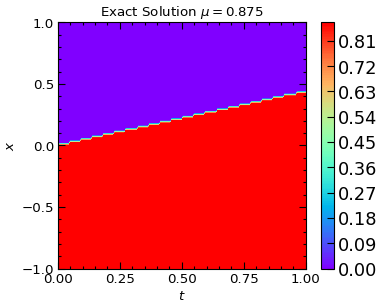

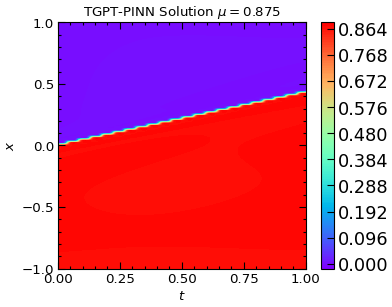

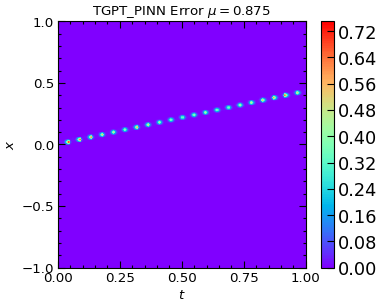

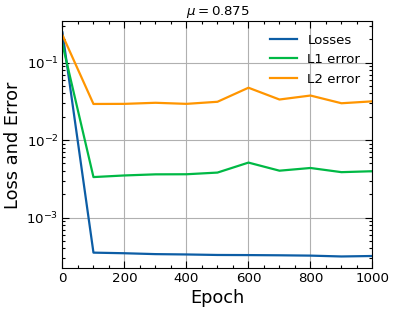

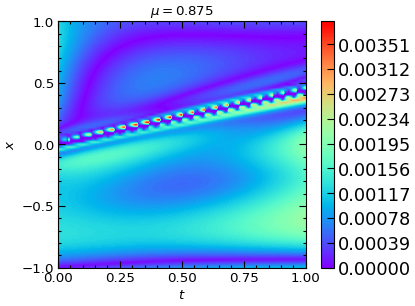

GPT-PINN at 0.875 with the Loss=0.0003195273457095027, rMAE = 0.003964116796851158, rRMSE = 0.03160283714532852 and Cor error = 0.001358856214210391


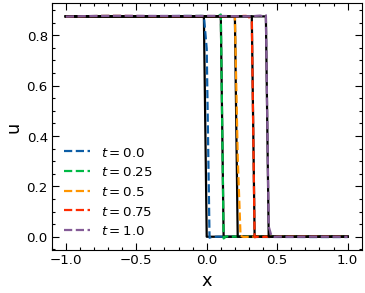

0.95 stopped at epoch: 0 | gpt_loss: 0.0394914411008358,rMAE: [0.06348133087158203], rRMSE:[0.10849041491746902], 0.0019871243275702, 0.0012505981139838696, 0.002499833470210433, 0.0
0.95 stopped at epoch: 500 | gpt_loss: 0.00040284954593516886,rMAE: 0.003925334196537733, rRMSE:0.032406389713287354, 0.0003675104817375541, 2.82820951724716e-06, 7.05698198544269e-07, 0.0
0.95 stopped at epoch: 1000 | gpt_loss: 0.00039716484025120735,rMAE: 0.0038350806571543217, rRMSE:0.026764538139104843, 0.0003453390090726316, 4.275441369827604e-06, 9.071405884242267e-07, 0.0
layer1:tensor([[ 1.1714, -0.0856],
        [-0.3292,  1.1118]], device='cuda:0') and tensor([0.0065, 0.0080], device='cuda:0') and layer3:tensor([[0.9512]], device='cuda:0')
GPT-PINN Training Completed



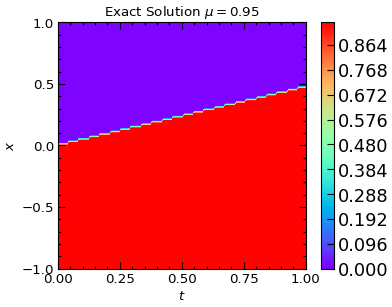

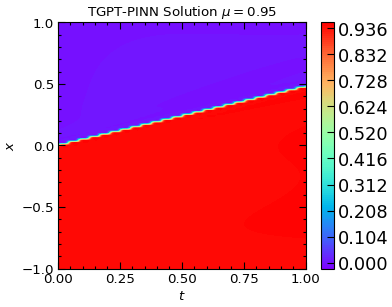

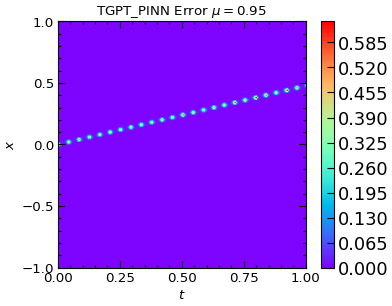

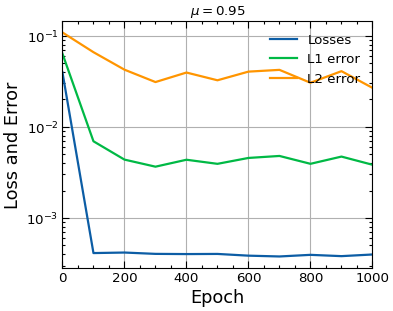

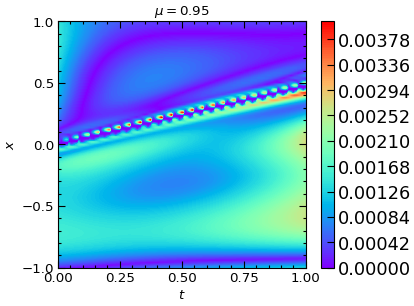

GPT-PINN at 0.95 with the Loss=0.00039716484025120735, rMAE = 0.0038350806571543217, rRMSE = 0.026764538139104843 and Cor error = 0.001515913405455649


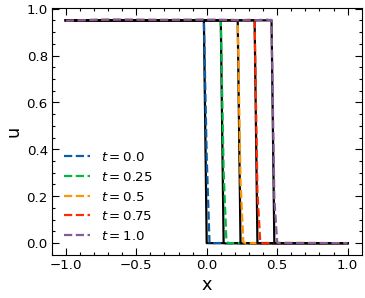

1.025 stopped at epoch: 0 | gpt_loss: 0.01030887570232153,rMAE: [0.030221328139305115], rRMSE:[0.06740939617156982], 0.0009354822104796767, 0.0003122451307717711, 0.0006250942824408412, 0.0
1.025 stopped at epoch: 500 | gpt_loss: 0.0004544372786767781,rMAE: 0.006018861196935177, rRMSE:0.05759012699127197, 0.0004198776150587946, 2.961131031042896e-06, 4.948368541590753e-07, 0.0
1.025 stopped at epoch: 1000 | gpt_loss: 0.0004764468176290393,rMAE: 0.004609030671417713, rRMSE:0.042066022753715515, 0.0004290372598916292, 3.92665242543444e-06, 8.143042578012682e-07, 0.0
layer1:tensor([[ 1.1340, -0.0952],
        [-0.2253,  1.1027]], device='cuda:0') and tensor([0.0008, 0.0030], device='cuda:0') and layer3:tensor([[1.0259]], device='cuda:0')
GPT-PINN Training Completed



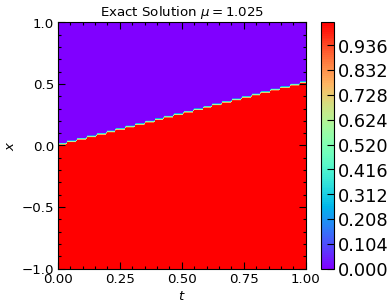

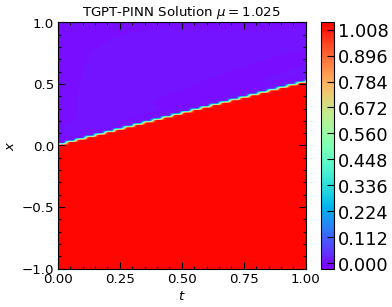

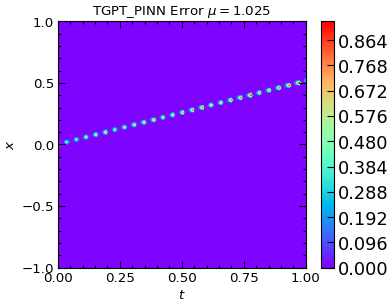

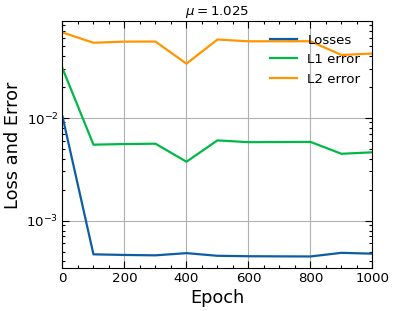

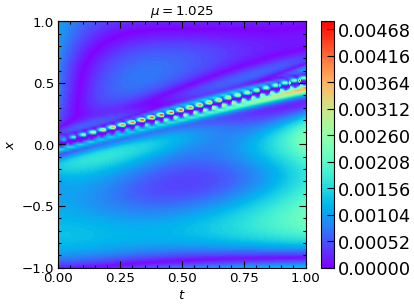

GPT-PINN at 1.025 with the Loss=0.0004764468176290393, rMAE = 0.004609030671417713, rRMSE = 0.042066022753715515 and Cor error = 0.0011963159777224064


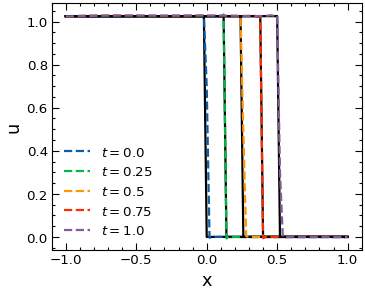

1.1 stopped at epoch: 0 | gpt_loss: 0.15692074596881866,rMAE: [0.10912743955850601], rRMSE:[0.16245266795158386], 0.006928157992660999, 0.004998895805329084, 0.010000363923609257, 0.0
1.1 stopped at epoch: 500 | gpt_loss: 0.0005435890634544194,rMAE: 0.003698183223605156, rRMSE:0.02998441830277443, 0.0005186558119021356, 1.703667180663615e-06, 7.89655700828007e-07, 0.0
1.1 stopped at epoch: 1000 | gpt_loss: 0.0005242135957814753,rMAE: 0.00575732858851552, rRMSE:0.05256366729736328, 0.00047546636778861284, 3.513641331664985e-06, 1.3610822406917578e-06, 0.0
layer1:tensor([[ 1.1475, -0.1113],
        [-0.2917,  1.1705]], device='cuda:0') and tensor([-0.0003,  0.0041], device='cuda:0') and layer3:tensor([[1.1012]], device='cuda:0')
GPT-PINN Training Completed



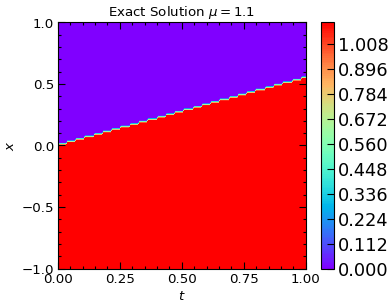

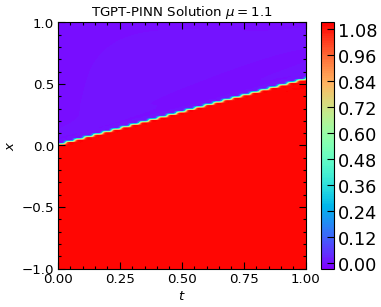

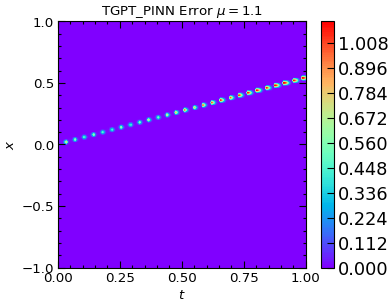

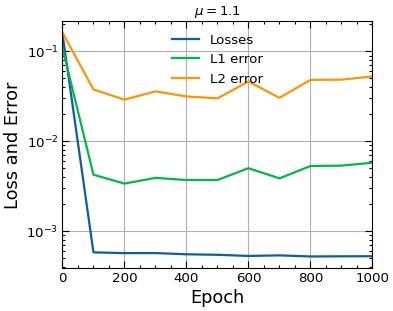

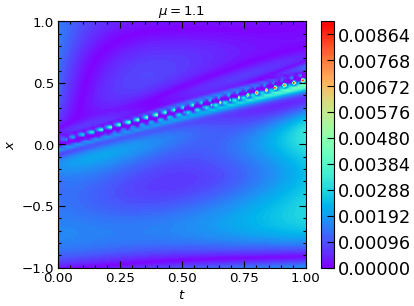

GPT-PINN at 1.1 with the Loss=0.0005242135957814753, rMAE = 0.00575732858851552, rRMSE = 0.05256366729736328 and Cor error = 0.0014381447108462453


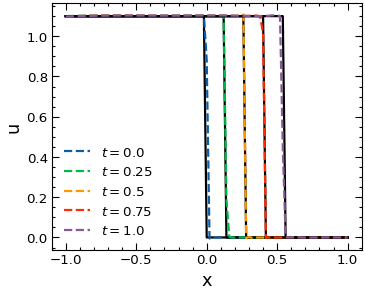

1.175 stopped at epoch: 0 | gpt_loss: 0.4793265163898468,rMAE: [0.1779240518808365], rRMSE:[0.23227296769618988], 0.01996512897312641, 0.015310532413423061, 0.0306256040930748, 0.0
1.175 stopped at epoch: 500 | gpt_loss: 0.0006207308615557849,rMAE: 0.004257091786712408, rRMSE:0.041406866163015366, 0.0005994361126795411, 1.5980157286321628e-06, 5.314591362548526e-07, 0.0
1.175 stopped at epoch: 1000 | gpt_loss: 0.0005960785201750696,rMAE: 0.005006334278732538, rRMSE:0.045099206268787384, 0.0005483277491293848, 3.32882132170198e-06, 1.4462560784522793e-06, 0.0
layer1:tensor([[ 1.1215, -0.1379],
        [-0.3078,  1.1999]], device='cuda:0') and tensor([0.0006, 0.0057], device='cuda:0') and layer3:tensor([[1.1762]], device='cuda:0')
GPT-PINN Training Completed



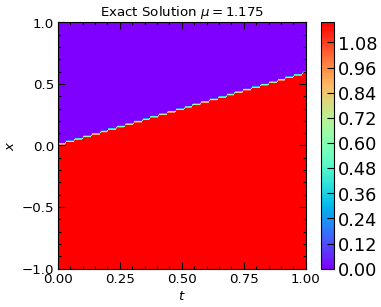

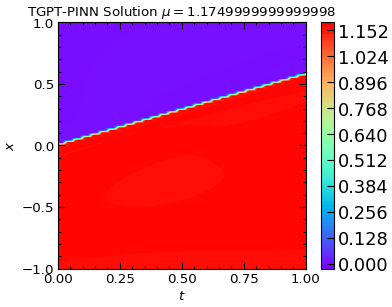

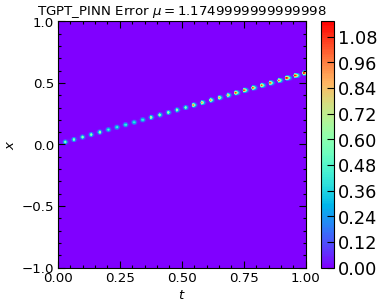

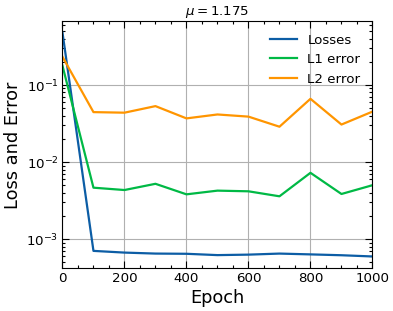

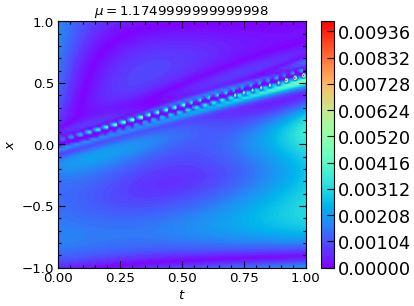

GPT-PINN at 1.1749999999999998 with the Loss=0.0005960785201750696, rMAE = 0.005006334278732538, rRMSE = 0.045099206268787384 and Cor error = 0.0014219186268746853


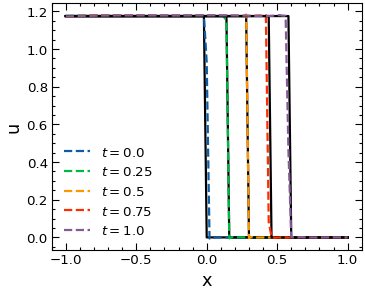

1.25 stopped at epoch: 0 | gpt_loss: 0.9775271415710449,rMAE: [0.23802797496318817], rRMSE:[0.29036977887153625], 0.040046434849500656, 0.03124719113111496, 0.06250087916851044, 0.0
1.25 stopped at epoch: 500 | gpt_loss: 0.0007440515328198671,rMAE: 0.003606949932873249, rRMSE:0.03456186130642891, 0.0007250216440297663, 1.5650005025236169e-06, 3.379884674359346e-07, 0.0
1.25 stopped at epoch: 1000 | gpt_loss: 0.0006842850707471371,rMAE: 0.004354711621999741, rRMSE:0.03982507809996605, 0.0006412967923097312, 2.9689690563827753e-06, 1.3298574685904896e-06, 0.0
layer1:tensor([[ 1.0804, -0.1527],
        [-0.3160,  1.2240]], device='cuda:0') and tensor([0.0015, 0.0074], device='cuda:0') and layer3:tensor([[1.2509]], device='cuda:0')
GPT-PINN Training Completed



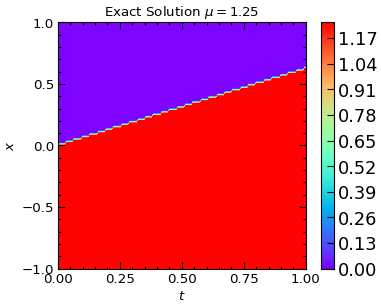

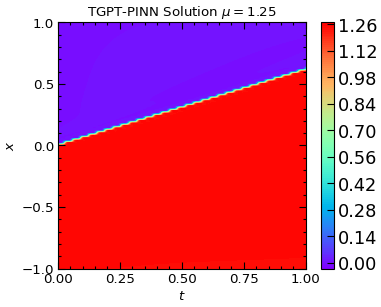

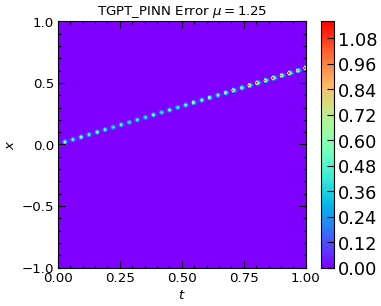

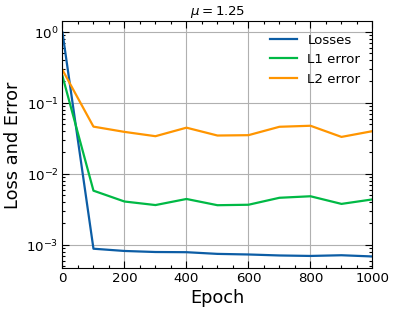

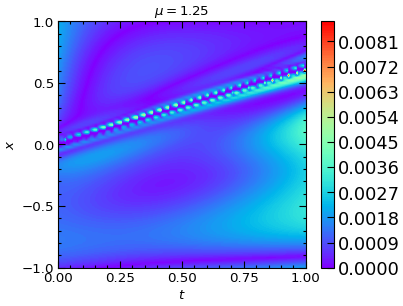

GPT-PINN at 1.25 with the Loss=0.0006842850707471371, rMAE = 0.004354711621999741, rRMSE = 0.03982507809996605 and Cor error = 0.0012380779953673482


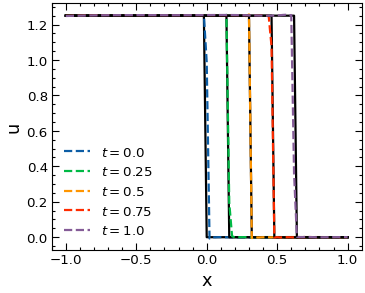

1.325 stopped at epoch: 0 | gpt_loss: 1.651522159576416,rMAE: [0.291162371635437], rRMSE:[0.34079012274742126], 0.06717207282781601, 0.05280885100364685, 0.1056261733174324, 0.0
1.325 stopped at epoch: 500 | gpt_loss: 0.0008375385659746826,rMAE: 0.003299616975709796, rRMSE:0.02956736832857132, 0.0008111071074381471, 2.119775217579445e-06, 5.233723072706198e-07, 0.0
1.325 stopped at epoch: 1000 | gpt_loss: 0.0007809875532984734,rMAE: 0.004102763719856739, rRMSE:0.03650786355137825, 0.0007291697547771037, 3.578870973797166e-06, 1.6029091511882143e-06, 0.0
layer1:tensor([[ 1.0582, -0.1795],
        [-0.3343,  1.2707]], device='cuda:0') and tensor([0.0028, 0.0096], device='cuda:0') and layer3:tensor([[1.3259]], device='cuda:0')
GPT-PINN Training Completed



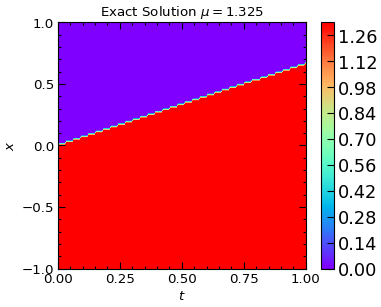

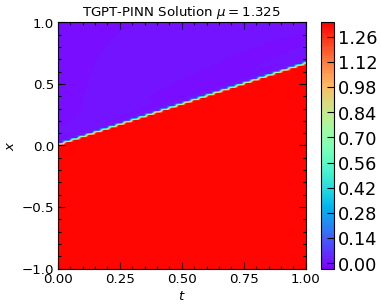

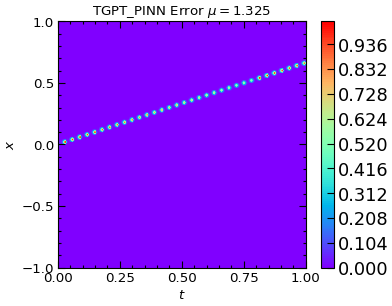

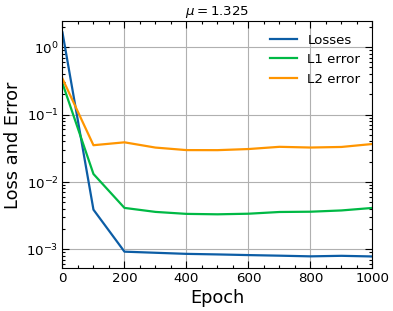

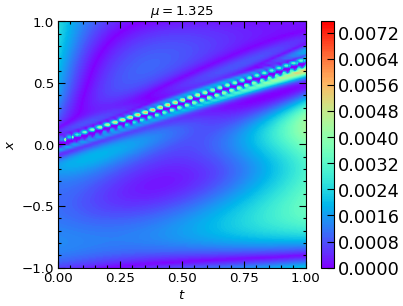

GPT-PINN at 1.325 with the Loss=0.0007809875532984734, rMAE = 0.004102763719856739, rRMSE = 0.03650786355137825 and Cor error = 0.0012655395548790693


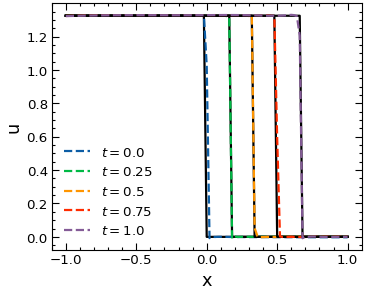

1.4 stopped at epoch: 0 | gpt_loss: 2.5013105869293213,rMAE: [0.3384503424167633], rRMSE:[0.3852872848510742], 0.10134195536375046, 0.07999547570943832, 0.16000136733055115, 0.0
1.4 stopped at epoch: 500 | gpt_loss: 0.0009806008310988545,rMAE: 0.004127643536776304, rRMSE:0.040370628237724304, 0.0009411623468622565, 3.192149961250834e-06, 7.517037374782376e-07, 0.0
1.4 stopped at epoch: 1000 | gpt_loss: 0.000897408346645534,rMAE: 0.003867513034492731, rRMSE:0.0354449599981308, 0.0008446112624369562, 3.7939839785394724e-06, 1.4857273527013604e-06, 0.0
layer1:tensor([[ 1.0288, -0.1850],
        [-0.3379,  1.2936]], device='cuda:0') and tensor([0.0046, 0.0133], device='cuda:0') and layer3:tensor([[1.4006]], device='cuda:0')
GPT-PINN Training Completed



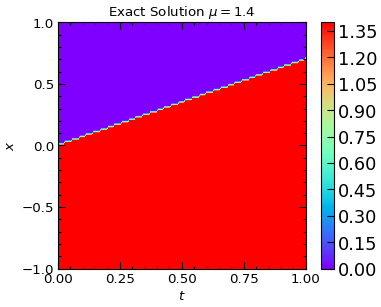

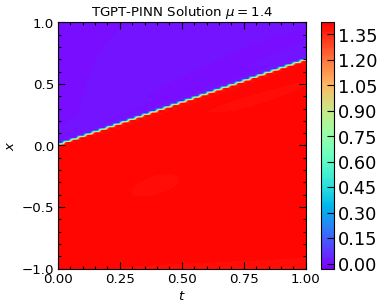

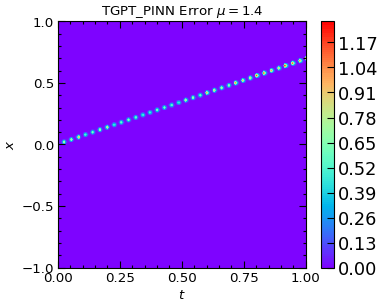

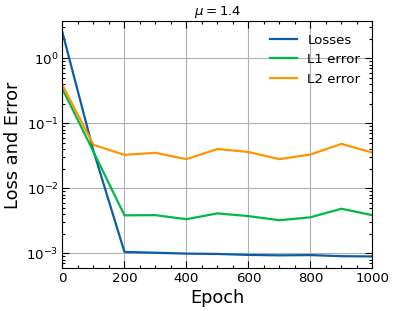

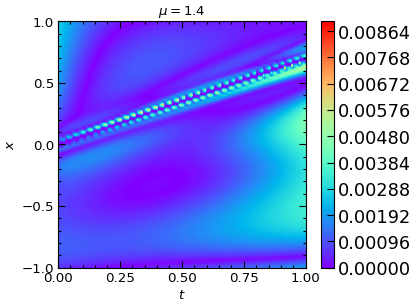

GPT-PINN at 1.4 with the Loss=0.000897408346645534, rMAE = 0.003867513034492731, rRMSE = 0.0354449599981308 and Cor error = 0.0011582921724766493


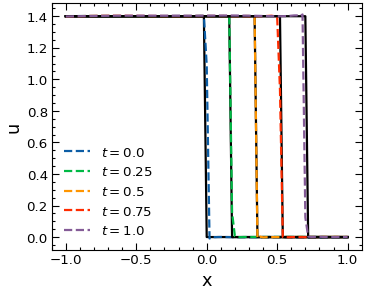

1.475 stopped at epoch: 0 | gpt_loss: 3.5268940925598145,rMAE: [0.3807065486907959], rRMSE:[0.4245857000350952], 0.14255622029304504, 0.11280713975429535, 0.22562667727470398, 0.0
1.475 stopped at epoch: 500 | gpt_loss: 0.0011292117414996028,rMAE: 0.003642045194283128, rRMSE:0.0325615368783474, 0.0010799213778227568, 3.6364051538839703e-06, 1.2926282124681165e-06, 0.0
1.475 stopped at epoch: 1000 | gpt_loss: 0.0010250810300931334,rMAE: 0.0035364192444831133, rRMSE:0.030688565224409103, 0.0009606771054677665, 5.014280759496614e-06, 1.4261113392421976e-06, 0.0
layer1:tensor([[ 1.0017, -0.1971],
        [-0.3480,  1.3464]], device='cuda:0') and tensor([0.0077, 0.0174], device='cuda:0') and layer3:tensor([[1.4754]], device='cuda:0')
GPT-PINN Training Completed



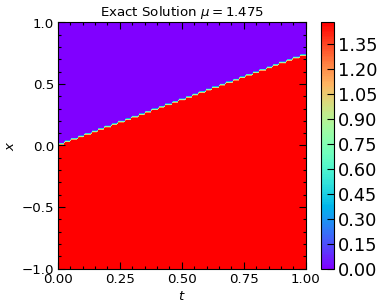

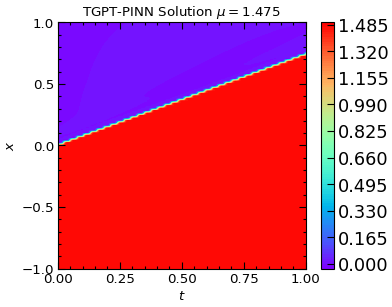

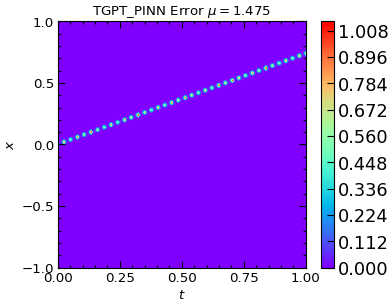

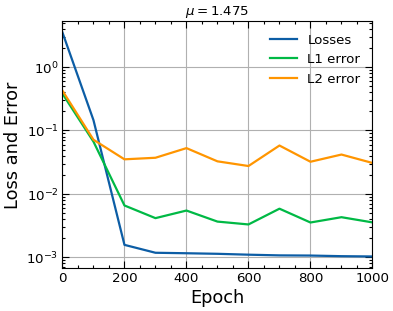

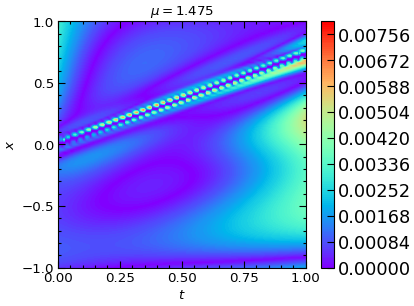

GPT-PINN at 1.475 with the Loss=0.0010250810300931334, rMAE = 0.0035364192444831133, rRMSE = 0.030688565224409103 and Cor error = 0.0011688449885696173


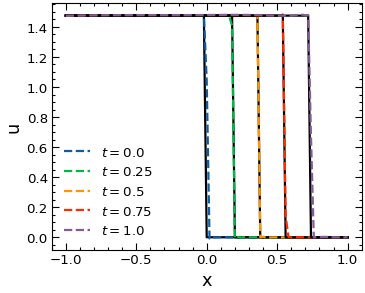

1.55 stopped at epoch: 0 | gpt_loss: 4.728271007537842,rMAE: [0.4185304045677185], rRMSE:[0.45980387926101685], 0.19081471860408783, 0.15124374628067017, 0.3025018870830536, 0.0
1.55 stopped at epoch: 500 | gpt_loss: 0.0012593576684594154,rMAE: 0.003555920673534274, rRMSE:0.029631584882736206, 0.0011964956065639853, 4.440802058525151e-06, 1.845399197009101e-06, 0.0
1.55 stopped at epoch: 1000 | gpt_loss: 0.0011443992843851447,rMAE: 0.0034443256445229053, rRMSE:0.029423335567116737, 0.0010725788306444883, 5.6843500715331174e-06, 1.4976972124713939e-06, 0.0
layer1:tensor([[ 0.9804, -0.2083],
        [-0.3593,  1.3890]], device='cuda:0') and tensor([0.0101, 0.0214], device='cuda:0') and layer3:tensor([[1.5503]], device='cuda:0')
GPT-PINN Training Completed



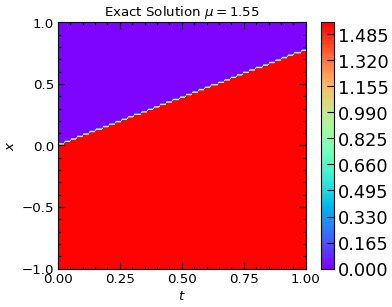

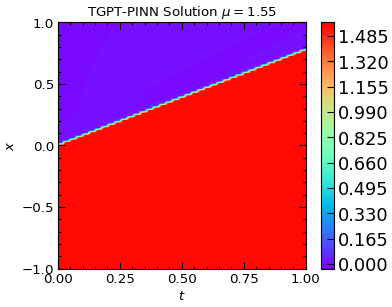

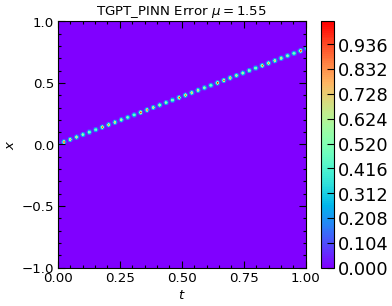

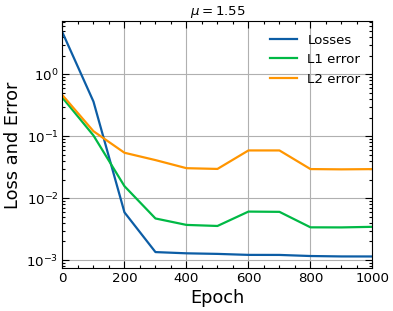

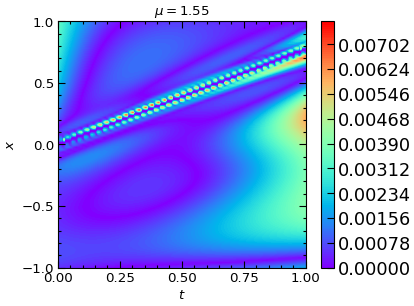

GPT-PINN at 1.55 with the Loss=0.0011443992843851447, rMAE = 0.0034443256445229053, rRMSE = 0.029423335567116737 and Cor error = 0.001194395706988871


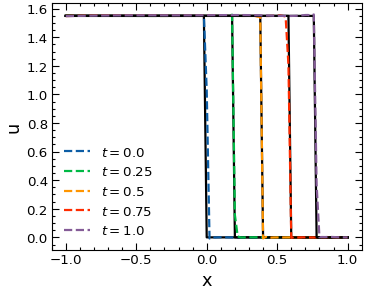

1.625 stopped at epoch: 0 | gpt_loss: 6.105443954467773,rMAE: [0.4527108371257782], rRMSE:[0.49139490723609924], 0.24611759185791016, 0.19530542194843292, 0.3906272053718567, 0.0
1.625 stopped at epoch: 500 | gpt_loss: 0.0014247074723243713,rMAE: 0.003634059801697731, rRMSE:0.0272592231631279, 0.0013111626030877233, 7.508438102377113e-06, 3.846043455268955e-06, 0.0
1.625 stopped at epoch: 1000 | gpt_loss: 0.0012682011583819985,rMAE: 0.003509857226163149, rRMSE:0.02958264946937561, 0.0012025838950648904, 5.1383399295446e-06, 1.423381945642177e-06, 0.0
layer1:tensor([[ 0.9456, -0.1957],
        [-0.3895,  1.4678]], device='cuda:0') and tensor([0.0150, 0.0317], device='cuda:0') and layer3:tensor([[1.6248]], device='cuda:0')
GPT-PINN Training Completed



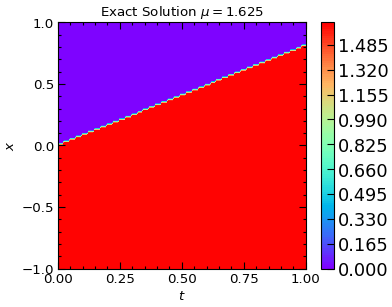

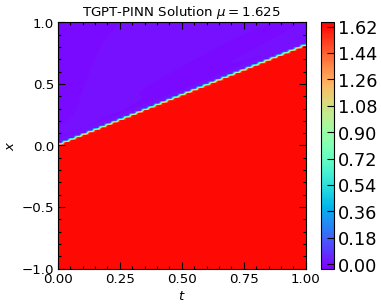

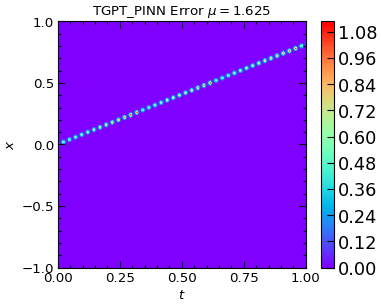

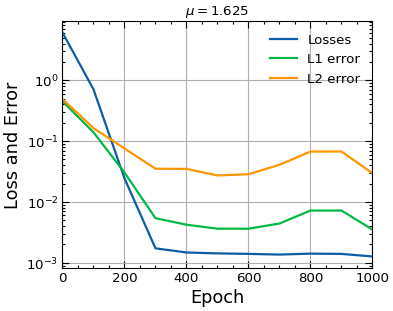

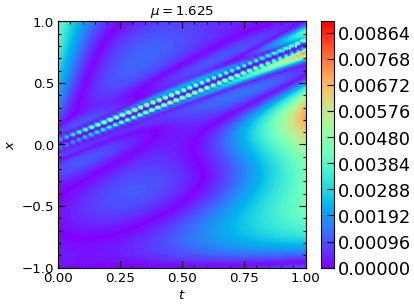

GPT-PINN at 1.625 with the Loss=0.0012682011583819985, rMAE = 0.003509857226163149, rRMSE = 0.02958264946937561 and Cor error = 0.0012876325054094195


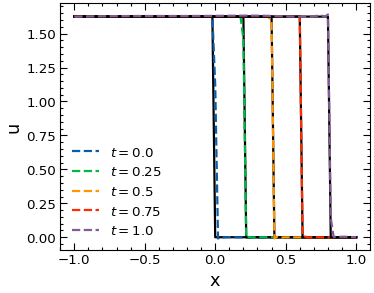

1.7 stopped at epoch: 0 | gpt_loss: 7.658411026000977,rMAE: [0.48378702998161316], rRMSE:[0.5200667381286621], 0.30846482515335083, 0.24499209225177765, 0.49000251293182373, 0.0
1.7 stopped at epoch: 500 | gpt_loss: 0.0016196080250665545,rMAE: 0.00384480319917202, rRMSE:0.02902570366859436, 0.0014747593086212873, 9.471584235143382e-06, 5.013284408050822e-06, 0.0
1.7 stopped at epoch: 1000 | gpt_loss: 0.0014191879890859127,rMAE: 0.0034932917915284634, rRMSE:0.028195710852742195, 0.0013485472882166505, 5.520519152923953e-06, 1.543554276395298e-06, 0.0
layer1:tensor([[ 0.9377, -0.2054],
        [-0.3920,  1.5136]], device='cuda:0') and tensor([0.0183, 0.0385], device='cuda:0') and layer3:tensor([[1.6997]], device='cuda:0')
GPT-PINN Training Completed



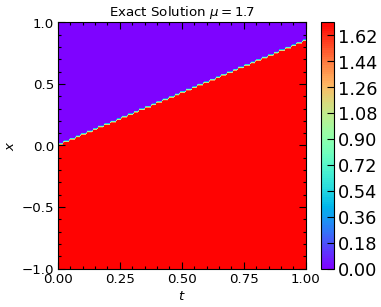

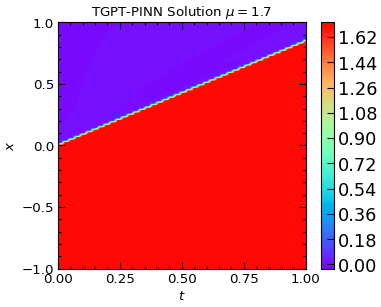

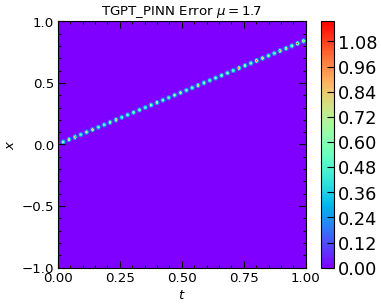

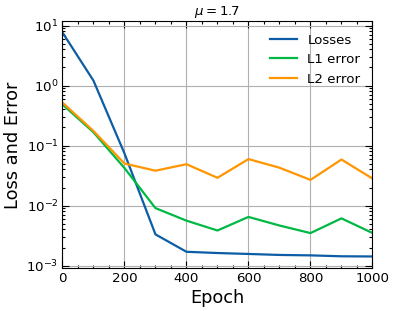

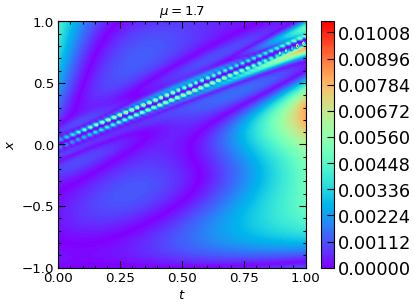

GPT-PINN at 1.7 with the Loss=0.0014191879890859127, rMAE = 0.0034932917915284634, rRMSE = 0.028195710852742195 and Cor error = 0.0013850103132426739


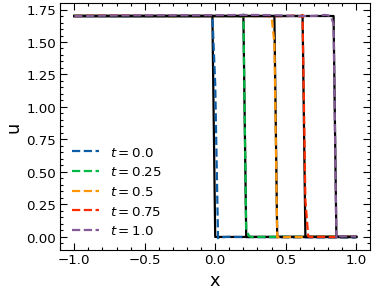

1.775 stopped at epoch: 0 | gpt_loss: 9.38716983795166,rMAE: [0.5116865038871765], rRMSE:[0.5458240509033203], 0.37785622477531433, 0.3003036677837372, 0.6006276607513428, 0.0
1.775 stopped at epoch: 500 | gpt_loss: 0.0019217787776142359,rMAE: 0.0043555148877203465, rRMSE:0.032490022480487823, 0.0016370391240343451, 1.7721005860948935e-05, 1.0752966772997752e-05, 0.0
1.775 stopped at epoch: 1000 | gpt_loss: 0.0016119026113301516,rMAE: 0.003975695930421352, rRMSE:0.03225076198577881, 0.001508351182565093, 7.19837498763809e-06, 3.15676697937306e-06, 0.0
layer1:tensor([[ 0.8830, -0.1820],
        [-0.4418,  1.5878]], device='cuda:0') and tensor([0.0266, 0.0550], device='cuda:0') and layer3:tensor([[1.7740]], device='cuda:0')
GPT-PINN Training Completed



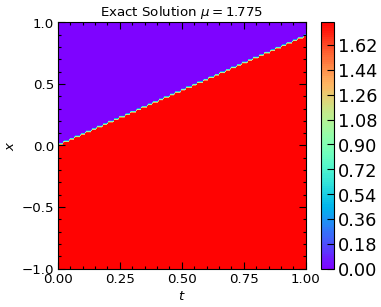

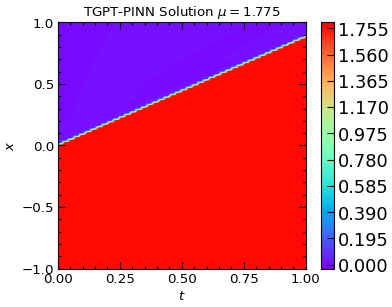

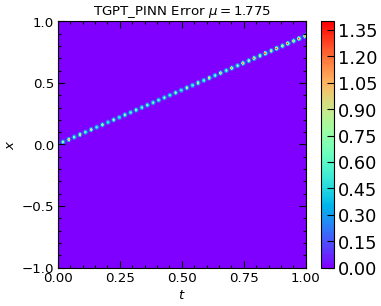

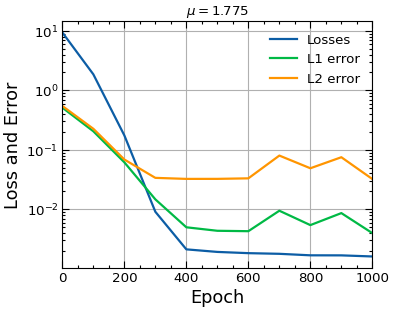

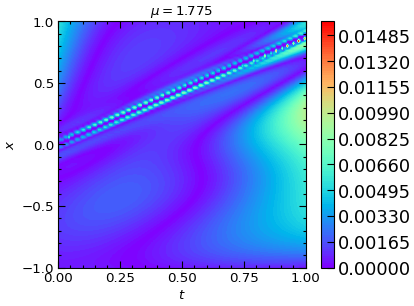

GPT-PINN at 1.775 with the Loss=0.0016119026113301516, rMAE = 0.003975695930421352, rRMSE = 0.03225076198577881 and Cor error = 0.0015710757579654455


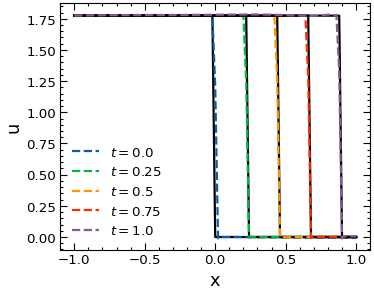

1.85 stopped at epoch: 0 | gpt_loss: 11.291725158691406,rMAE: [0.5377585887908936], rRMSE:[0.5698642134666443], 0.45429205894470215, 0.3612403869628906, 0.7225030064582825, 0.0
1.85 stopped at epoch: 500 | gpt_loss: 0.002221494447439909,rMAE: 0.004418045282363892, rRMSE:0.027177637442946434, 0.001804733881726861, 2.585302536317613e-05, 1.5823023204575293e-05, 0.0
1.85 stopped at epoch: 1000 | gpt_loss: 0.0017636596458032727,rMAE: 0.003837855067104101, rRMSE:0.026726150885224342, 0.0016236690571531653, 8.521137715433724e-06, 5.477922968566418e-06, 0.0
layer1:tensor([[ 0.8799, -0.1883],
        [-0.4632,  1.6807]], device='cuda:0') and tensor([0.0358, 0.0719], device='cuda:0') and layer3:tensor([[1.8487]], device='cuda:0')
GPT-PINN Training Completed



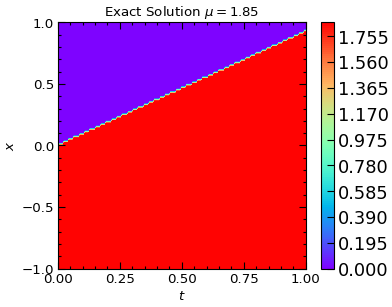

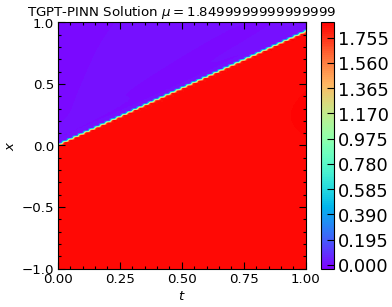

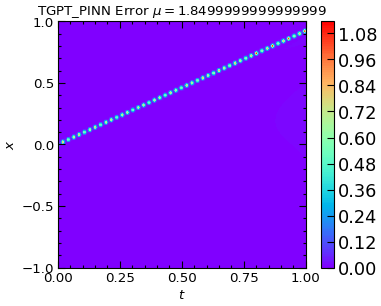

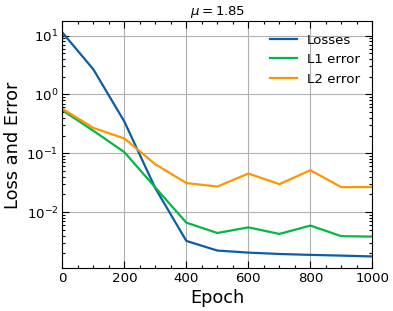

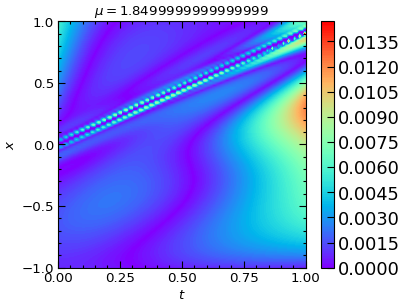

GPT-PINN at 1.8499999999999999 with the Loss=0.0017636596458032727, rMAE = 0.003837855067104101, rRMSE = 0.026726150885224342 and Cor error = 0.0018513069953769445


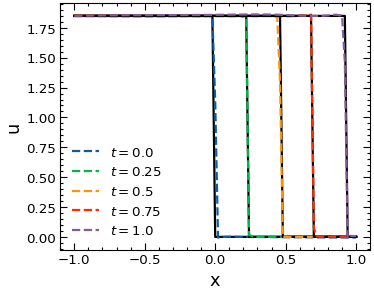

1.925 stopped at epoch: 0 | gpt_loss: 13.37207317352295,rMAE: [0.5611360669136047], rRMSE:[0.5914446711540222], 0.5377721190452576, 0.4278019666671753, 0.8556281924247742, 0.0
1.925 stopped at epoch: 500 | gpt_loss: 0.002687972504645586,rMAE: 0.005061072763055563, rRMSE:0.030313119292259216, 0.0019667812157422304, 4.57615424238611e-05, 2.6357585738878697e-05, 0.0
1.925 stopped at epoch: 1000 | gpt_loss: 0.0019813633989542723,rMAE: 0.00403958186507225, rRMSE:0.027350425720214844, 0.0017957281088456511, 1.0186910003540106e-05, 8.376618097827304e-06, 0.0
layer1:tensor([[ 0.8577, -0.1941],
        [-0.4980,  1.7410]], device='cuda:0') and tensor([0.0448, 0.0905], device='cuda:0') and layer3:tensor([[1.9233]], device='cuda:0')
GPT-PINN Training Completed



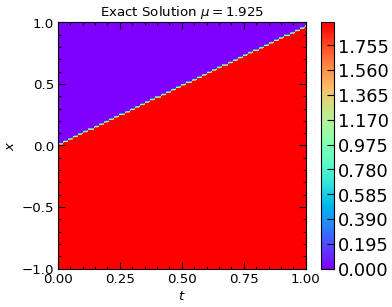

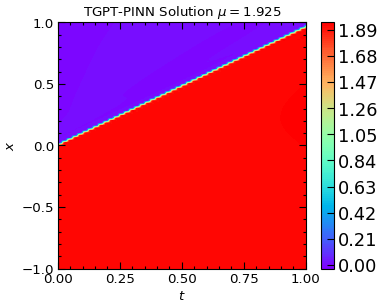

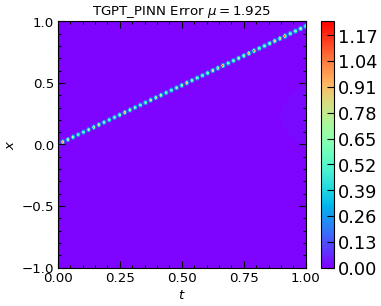

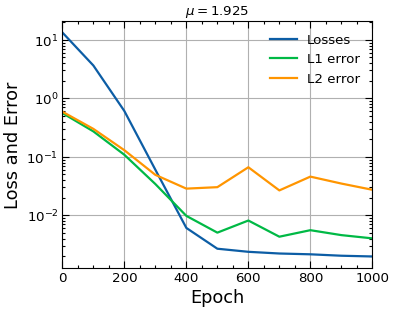

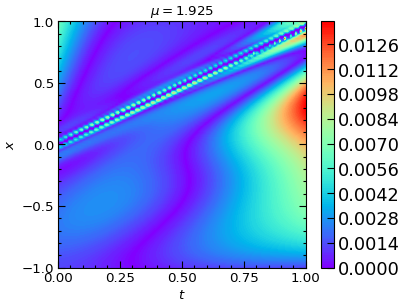

GPT-PINN at 1.925 with the Loss=0.0019813633989542723, rMAE = 0.00403958186507225, rRMSE = 0.027350425720214844 and Cor error = 0.002055558143183589


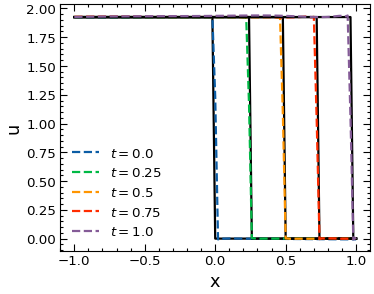

2.0 stopped at epoch: 0 | gpt_loss: 15.628218650817871,rMAE: [0.5830081701278687], rRMSE:[0.6115861535072327], 0.6282966136932373, 0.4999886155128479, 1.000003457069397, 0.0
2.0 stopped at epoch: 500 | gpt_loss: 0.004580490291118622,rMAE: 0.010341574437916279, rRMSE:0.06608425080776215, 0.0023815634194761515, 0.0001333732361672446, 8.651940879644826e-05, 0.0
2.0 stopped at epoch: 1000 | gpt_loss: 0.0025288136675953865,rMAE: 0.008247440680861473, rRMSE:0.06302787363529205, 0.0020815711468458176, 1.786828215699643e-05, 2.6855970645556226e-05, 0.0
layer1:tensor([[ 0.7634, -0.0892],
        [-0.6006,  1.9237]], device='cuda:0') and tensor([0.0785, 0.1578], device='cuda:0') and layer3:tensor([[1.9963]], device='cuda:0')
GPT-PINN Training Completed



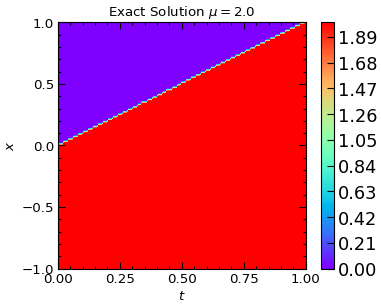

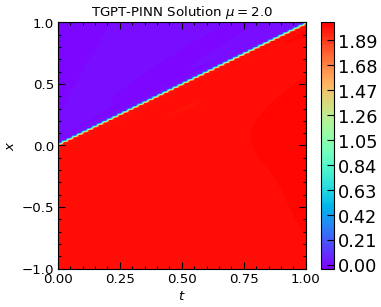

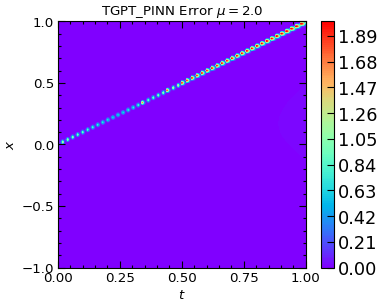

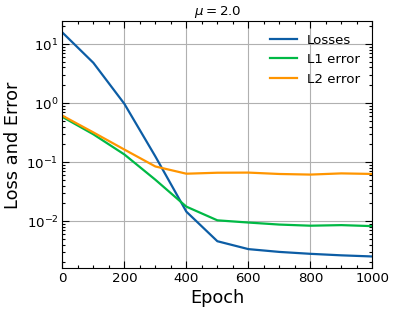

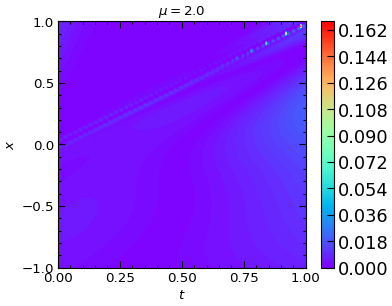

GPT-PINN at 2.0 with the Loss=0.0025288136675953865, rMAE = 0.008247440680861473, rRMSE = 0.06302787363529205 and Cor error = 0.00328201986849308


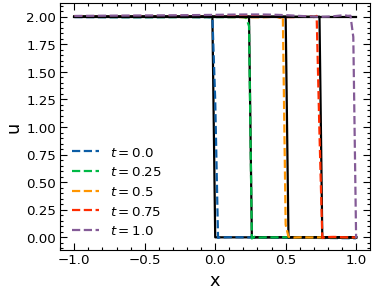

Largest Loss: 0.0025288136675953865 at 2.0
Largest L1: 0.009803878143429756 at 0.5
Largest L2: 0.0721389576792717 at 0.8
Loss:[0.00012756256910506636, 0.000157883288920857, 0.00018607893434818834, 0.00022900922340340912, 0.00027196938754059374, 0.0003195273457095027, 0.00039716484025120735, 0.0004764468176290393, 0.0005242135957814753, 0.0005960785201750696, 0.0006842850707471371, 0.0007809875532984734, 0.000897408346645534, 0.0010250810300931334, 0.0011443992843851447, 0.0012682011583819985, 0.0014191879890859127, 0.0016119026113301516, 0.0017636596458032727, 0.0019813633989542723, 0.0025288136675953865]
L1:[0.009803878143429756, 0.009589871391654015, 0.005367710255086422, 0.003990234341472387, 0.008114269003272057, 0.003964116796851158, 0.0038350806571543217, 0.004609030671417713, 0.00575732858851552, 0.005006334278732538, 0.004354711621999741, 0.004102763719856739, 0.003867513034492731, 0.0035364192444831133, 0.0034443256445229053, 0.003509857226163149, 0.0034932917915284634, 0.0039

In [6]:
i=0
layers_gpt = np.array([2, i+1, 1])
c_initial  = torch.full((1,i+1), 1/(i+1))
nu_loss = []
L1_err  = []
L2_err  = []
Cor_err =  []

gpt_train_time_1 = time.perf_counter()
for nu in nu_training:
    wi = torch.tensor([1.0], requires_grad=True)
    Exact_y0 = exact_u(nu,xt_test)[:,None]

    IC_data = create_IC_data(nu, Xi, Xf, Ti, Tf, IC_pts, IC_simple)
    IC_xt     = IC_data[0].to(device)
    IC_u      = IC_data[1].to(device)

    #print((P_list[0]).linears[0].bias)
    GPT_PINN = GPT(nu, layers_gpt, P_list[0:i+1], c_initial,xt_resid, f_hat, Exact_y0, xt_test, IC_xt, IC_u,  BC1, BC2,xt_RHL, xt_RHR,xt_RHt,xt_RHtL,Nx_train,Nt_train,dt).to(device)

    gpt_losses = gpt_train(GPT_PINN, nu, xt_resid, f_hat, Exact_y0, xt_test, IC_xt, IC_u, BC1, BC2, epochs_gpt, lr_gpt, tol_gpt)

    nu_loss.append(gpt_losses[0].item())
    L1_err.append(gpt_losses[3][-1])
    L2_err.append(gpt_losses[4][-1])


    Burgers_plot(xt_test, Exact_y0, Nx_test,Nt_test,title=fr"Exact Solution $\mu={round(nu,3)}$")
    Burgers_plot(xt_test, GPT_PINN.forward(xt_test), Nx_test,Nt_test,title=fr"TGPT-PINN Solution $\mu={nu}$")
    Burgers_plot(xt_test, abs(GPT_PINN.forward(xt_test)-Exact_y0), Nx_test,Nt_test,title=fr"TGPT_PINN Error $\mu={nu}$")

    plt.figure(dpi=80, figsize=(5,4))    
    plt.plot(gpt_losses[1], gpt_losses[2], label="Losses")
    plt.plot(gpt_losses[1], gpt_losses[3], label="L1 error")
    plt.plot(gpt_losses[1], gpt_losses[4], label="L2 error")
    #plt.plot(gpt_losses[1], gpt_losses[5], label="Loss_implict")
    #plt.plot(gpt_losses[1], gpt_losses[8], label="Loss_Res")
    #plt.plot(gpt_losses[1], gpt_losses[6], label="Loss_IC")
    #plt.plot(gpt_losses[1], gpt_losses[7], label="Loss_BC")

    plt.xlabel("Epoch",     fontsize=16)
    plt.ylabel("Loss and Error", fontsize=16)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    
    plt.grid(True)
    plt.xlim(0,max(gpt_losses[1]))
    plt.yscale('log')
    plt.title(fr"$\mu={round(nu,3)}$", fontsize=12)
    plt.legend(fontsize = 12)#
    plt.show()

    err =exact_u_err(exact_u(nu,xt_test)[:,None],GPT_PINN(xt_test),xt_test,nu)[1]
    Cor_err.append(err.item())
    print(f"GPT-PINN at {nu} with the Loss={gpt_losses[0].item()}, rMAE = {gpt_losses[3][-1]}, rRMSE = {gpt_losses[4][-1]} and Cor error = {err.item()}")

    plt.figure(dpi=80, figsize=(5,4))#dpi=150, figsize=(10,8)
    for ind in range(1, Nt_test+1,50):
        plt.plot(xt_test[0:Nx_test,0].detach().cpu(),Exact_y0[(ind-1)*Nx_test:ind*Nx_test,0].detach().cpu(),'k')
        #plt.scatter(xt_test[0:Nx_test,0].detach().cpu(),PINN(xt_test)[(ind-1)*Nx_test:ind*Nx_test,0].detach().cpu(),s=20,label=fr"$t={round((ind-1)*(Tf-Ti)/(Nt_test-1),3)}$")
        plt.plot(xt_test[0:Nx_test,0].detach().cpu(),GPT_PINN.forward(xt_test)[(ind-1)*Nx_test:ind*Nx_test,0].detach().cpu(),'--',label=fr"$t={round((ind-1)*(Tf-Ti)/(Nt_test-1),3)}$")
    plt.xlabel("x",     fontsize=16)
    plt.ylabel("u", fontsize=16)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tick_params(axis='both', which='minor', labelsize=12)

    plt.legend(fontsize = 12)#
    plt.show()

        
print(f"Largest Loss: {max(nu_loss)} at {nu_training[nu_loss.index(max(nu_loss))]}")
print(f"Largest L1: {max(L1_err)} at {nu_training[L1_err.index(max(L1_err))]}")
print(f"Largest L2: {max(L2_err)} at {nu_training[L2_err.index(max(L2_err))]}") 

print(f"Loss:{nu_loss}")
print(f"L1:{L1_err}")
print(f"L2:{L2_err}")

In [7]:
print(f"Largest Loss: {max(nu_loss)} at {nu_training[nu_loss.index(max(nu_loss))]}")
print(f"Largest L1: {max(L1_err)} at {nu_training[L1_err.index(max(L1_err))]}")
print(f"Largest L2: {max(L2_err)} at {nu_training[L2_err.index(max(L2_err))]}") 
print(f"Loss:{nu_loss}")
print(f"L1:{L1_err}")
print(f"L2:{L2_err}")
print(f"Error:{Cor_err}")

Largest Loss: 0.0025288136675953865 at 2.0
Largest L1: 0.009803878143429756 at 0.5
Largest L2: 0.0721389576792717 at 0.8
Loss:[0.00012756256910506636, 0.000157883288920857, 0.00018607893434818834, 0.00022900922340340912, 0.00027196938754059374, 0.0003195273457095027, 0.00039716484025120735, 0.0004764468176290393, 0.0005242135957814753, 0.0005960785201750696, 0.0006842850707471371, 0.0007809875532984734, 0.000897408346645534, 0.0010250810300931334, 0.0011443992843851447, 0.0012682011583819985, 0.0014191879890859127, 0.0016119026113301516, 0.0017636596458032727, 0.0019813633989542723, 0.0025288136675953865]
L1:[0.009803878143429756, 0.009589871391654015, 0.005367710255086422, 0.003990234341472387, 0.008114269003272057, 0.003964116796851158, 0.0038350806571543217, 0.004609030671417713, 0.00575732858851552, 0.005006334278732538, 0.004354711621999741, 0.004102763719856739, 0.003867513034492731, 0.0035364192444831133, 0.0034443256445229053, 0.003509857226163149, 0.0034932917915284634, 0.0039

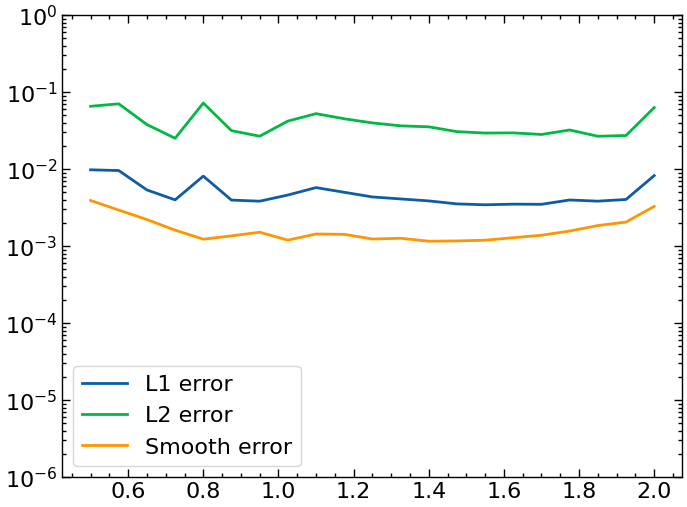

In [8]:
#plt.errorbar(nu_training,nu_loss,label='Loss')
plt.errorbar(nu_training,L1_err,label='L1 error')
plt.errorbar(nu_training,L2_err,label='L2 error')
plt.errorbar(nu_training,Cor_err,label='Smooth error')
plt.legend(frameon=True)
plt.ylim(1e-6,1)
plt.yscale('log')

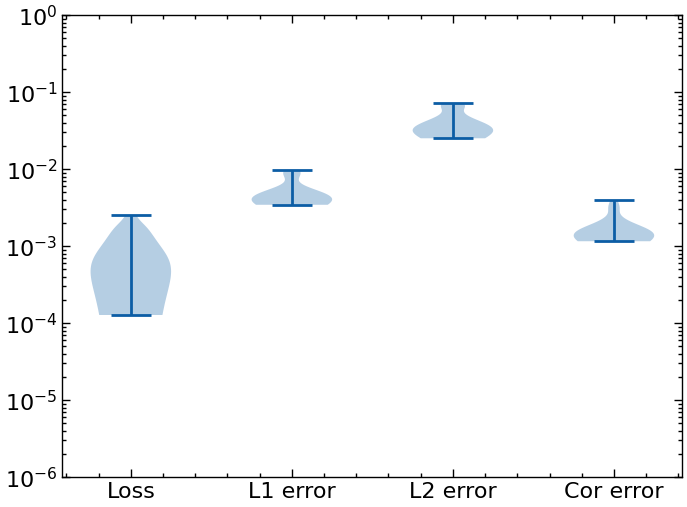

In [9]:
plt.violinplot([nu_loss, L1_err, L2_err ,Cor_err])
plt.xticks([1, 2, 3,4], ['Loss', 'L1 error', 'L2 error', 'Cor error'])
plt.ylim(1e-6,1)
plt.yscale('log')

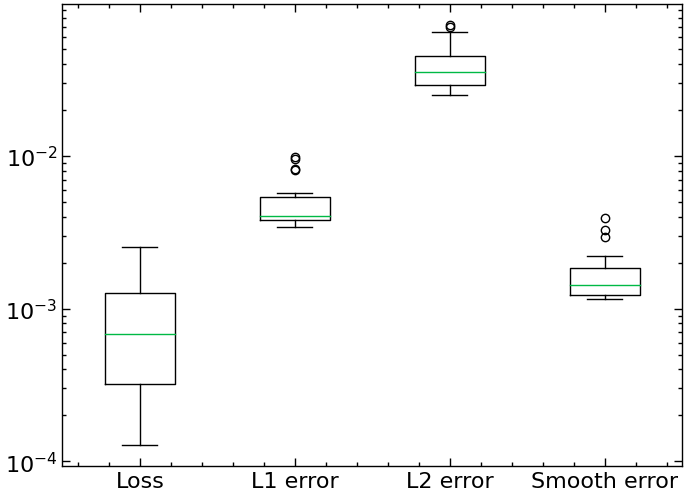

In [10]:
plt.boxplot([nu_loss, L1_err, L2_err,Cor_err], labels=['Loss', 'L1 error', 'L2 error','Smooth error'])
plt.yscale('log')

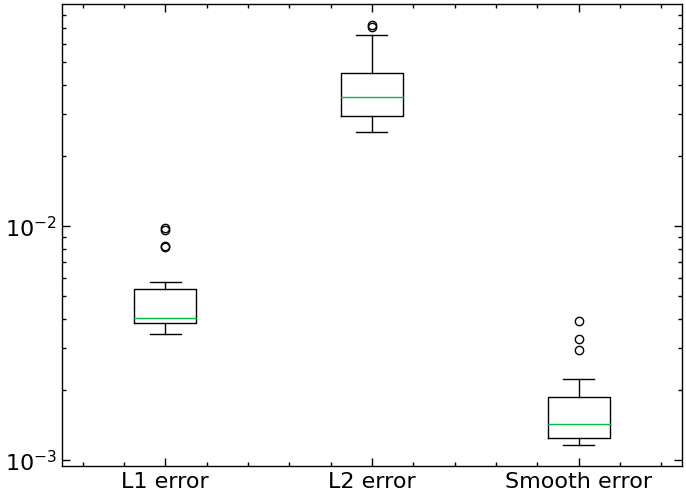

In [11]:
plt.boxplot([L1_err, L2_err,Cor_err], labels=[ 'L1 error', 'L2 error','Smooth error'])
plt.yscale('log')